<a href="https://colab.research.google.com/github/NeuromatchAcademy/content-creation/blob/updates/NeuromatchAcademy_DL_Tutorial_Carpentry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial ?: Tutorial's name
**Week ?, Day ?: Name of the day**

**By Neuromatch Academy**

__Content creators:__ Name Surname, Name Surname, Day Lead's Name

__Content reviewers:__ Name Surname, Name Surname

__Content editors:__ Name Surname, Name Surname

__Production editors:__ Name Surname, Name Surname




-This tutorial carpentry was originally written by *Kelson Shilling-Scrivo*

**Our 2021 Sponsors, including Presenting Sponsor Facebook Reality Labs**

<p align='center'><img src='https://github.com/NeuromatchAcademy/widgets/blob/master/sponsors.png?raw=True'/></p>

---
#Tutorial Objectives

Teach how to create didactic, easily digestable and fun content for the NMA-DL course.



This course will teach you:
*   DL code Styleguide
*   Video Do's / Don'ts
*   Written Content Do's / Don'ts
*   Exercise Creation Do's don't

This course will not teach you:

*   Tutorial formatting [found here](https://github.com/NeuromatchAcademy/content-creation/blob/main/Neuromatch_Tutorial_Format.ipynb)






In [8]:
# @title Tutorial slides
# @markdown These are the slides for the videos in the tutorial
from IPython.display import IFrame
link_id = "wcjrv"
print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

If you want to download the slides: https://osf.io/download/wcjrv/


---
# Setup

In [9]:
# @title Install dependencies
# @markdown ##### **WARNING:** There may be *errors* and/or *warnings* reported during the installation. However, they should be ignored.

# If any external library has to be installed, !pip install library --quiet

!pip install einops --quiet #TODO get einops installed by default 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.6 MB/s eta 0:00:00


In [10]:
# Import
# Import only the libraries/objects that you use in this tutorial. 

# follow this order: numpy>matplotlib. 
# import widgets in hidden Figure settings cell

import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from tqdm.notebook import tqdm, trange

# torch import style
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import make_grid
from IPython.display import HTML, display

In [11]:
# @title Figure settings
import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")

# Common Helper Functions 

In [12]:
# @title Helper functions

In [13]:
# @title Plotting functions
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

In [14]:
# @title Set random seed

# @markdown Executing `set_seed(seed=seed)` you are setting the seed

# for DL its critical to set the random seed so that students can have a
# baseline to compare their results to expected results.
# Read more here: https://pytorch.org/docs/stable/notes/randomness.html

# Call `set_seed` function in the exercises to ensure reproducibility.
import random
import torch
import numpy as np

def set_seed(seed=None, seed_torch=True):
  if seed is None:
    seed = np.random.choice(2 ** 32)
  random.seed(seed)
  np.random.seed(seed)
  if seed_torch:
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

  print(f'Random seed {seed} has been set.')

# In case that `DataLoader` is used
def seed_worker(worker_id):
  worker_seed = torch.initial_seed() % 2**32
  np.random.seed(worker_seed)
  random.seed(worker_seed)


# Before the exercises it should re-executed to ensure reproducibility
set_seed(seed=2021)  # change 2021 with any number you like

Random seed 2021 has been set.


In [15]:
# @title Set device (GPU or CPU). Execute `set_device()`

# inform the user if the notebook uses GPU or CPU.

def set_device():
  device = "cuda" if torch.cuda.is_available() else "cpu"
  if device != "cuda":
    print("GPU is not enabled in this notebook. \n"
          "If you want to enable it, in the menu under `Runtime` -> \n"
          "`Hardware accelerator.` and select `GPU` from the dropdown menu")
  else:
    print("GPU is enabled in this notebook. \n"
          "If you want to disable it, in the menu under `Runtime` -> \n"
          "`Hardware accelerator.` and select `None` from the dropdown menu")

  return device

In [16]:
SEED = 2021
set_seed(seed=SEED)
DEVICE = set_device()

Random seed 2021 has been set.
GPU is not enabled in this notebook. 
If you want to enable it, in the menu under `Runtime` -> 
`Hardware accelerator.` and select `GPU` from the dropdown menu


---

# Section 1: Videos

Place the youtube video ID and then hide the cell. Videos can be found [here](https://docs.google.com/spreadsheets/d/1I-q6YRn-o9XCE45KCd4zs80LKPiu7BvuqmAO_xIr55Y/edit?usp=sharing). The list is continuously being updated.

In [17]:
# @title Video 1: Video 1 Name
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')  
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'ca21SNqt78I'), ('Bilibili', 'BV1Av411n7oL'), ('Osf', '<video_id_3>')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

The final cell with the video should look like the one below:

In [18]:
# @title Video 2: Video 2 Name
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')  
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'l-K6495BN-4'), ('Bilibili', 'BV1gf4y1j7UZ'), ('Osf', '<video_id_3>')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

Take-aways: 

1.   one concept per video 
2.   many small videos preferable to 1 large video
3.   Keep distance between idea and interaction small 

Do not: 

1.   Speak in mathematical notation 


> instead of: as we increase alpha, Say : as  we increase the learning rate. 



---
# Section 2: Written Text
The text is meant to suppliment the videos and reiterate the key information provided in the lecture. It is the RAM buffer that stores the key points of the video while they complete the exercise. It is **not** a source of completely new information. Writing an entire section with a new concept entirely in text form is a anti-pattern and usually a sign that a video was missing a key concept, and a large written section was used as a band-aid. 








---
# Section 3: Writing Exercises 

This exercise fits in this subsection so is a level 3 header. We name it after the section it is in.

Very briefly summarize the exercise here. The first exercise should not be too difficult, to serve as a warm-up for students. Outputs of the code cell will ideally be a plot or a print of the architecture (so students can easily check against the correct one). In limited cases, the output may be printing numbers, text, etc. In that case you need to write the solution output manually after the exercise (E.g.: "You should see the syntetic data when running the cell above").

In [19]:
# @markdown *Execute this cell to enable the plotting function: `plot_data`*

def plot_data(X, y):
  """
  Synthetic data generator in the form:
      y = Xw + b + gaussian_noise(0, sigma).
  
  Parameters
  ----------
  X: torch.tensor
      the independent variable(s).
  y: torch.tensor
      the dependent variable
  
  Returns
  -------
  Nothing.
  """

  plt.figure()
  plt.scatter(X, y)
  plt.xlabel('x (independent variable)')
  plt.ylabel('y (dependent variable)')
  plt.show()

## Coding Exercise 3: Exercise title

Warn them when they will use a helper function. For example: In this exercise, you will also invoke `plot_data` which plots the data you have generated.

In [20]:
def synthetic_dataset(weights, bias, num_examples=1000, sigma=0.01, seed=2021):
  """
  Synthetic data generator in the form:
      y = Xw + b + gaussian_noise(0, sigma).
  
  Parameters
  ----------
  weights : torch.tensor
      weights. The length of `w` denotes the number of independent variables
  bias : torch.tensor
      bias (offset or intercept).
  num_examples : INT, optional
      DESCRIPTION. The default is 1000.
  sigma : FLOAT, optional
      Standard deviation of the Gaussian noise. The default is 0.01.
  seed : INT, optional
      Seed the RNG for reproducibility. The default is 2021.
  
  Returns
  -------
  X: torch.tensor
      the independent variable(s).
  y: torch.tensor
      the dependent variable
  
  """

  # Set the seed for reproducibility
  set_seed(seed)

  X = torch.normal(0, 1, (weights.shape[0], num_examples))
  #################################################
  ## TODO for students: details of what they should do ##
  # Fill out function and remove
  raise NotImplementedError("Student exercise: say what they should have done")
  #################################################
  # Have a comment for every line of code they need to write, and when possible have
  # variables written with ellipses where they should fill in or ellipses where they should
  # fill in inputs to functions
  y = ...
  # Another comment because they need to add another line of code
  y += ...

  return X, y.reshape((-1, 1))


w = torch.tensor([2.5]).reshape(-1,1)
b = 1.2
N = 50

# Uncomment the code below to test your function
# we usually define the plotting function in the hidden Helper Functions
# so students don't have to see a bunch of boilerplate matplotlib code
# xkcd style for solution plot
# X, y = synthetic_dataset(weights=w, bias=b, num_examples=10, sigma=2.5,
#                          seed=2021)
# plot_data(X, y)

---
__Editor guideline for exercise solution formatting:__
- the presence of # to_remove solution in the first line of solution block
- The absence of the fenced (#####) block that raises a NotImplementedError
- Valid code replacing all ellipses  (...)
- Code that uses or depends on the completed function/lines is uncommented
- Plotting code is indented under a with plt.xkcd(): context manager.
- Using ***SAME SEED*** such that student should be able to replicate sample results **exactly**.
- **All other comments and code should be identical**
---

Random seed 2021 has been set.


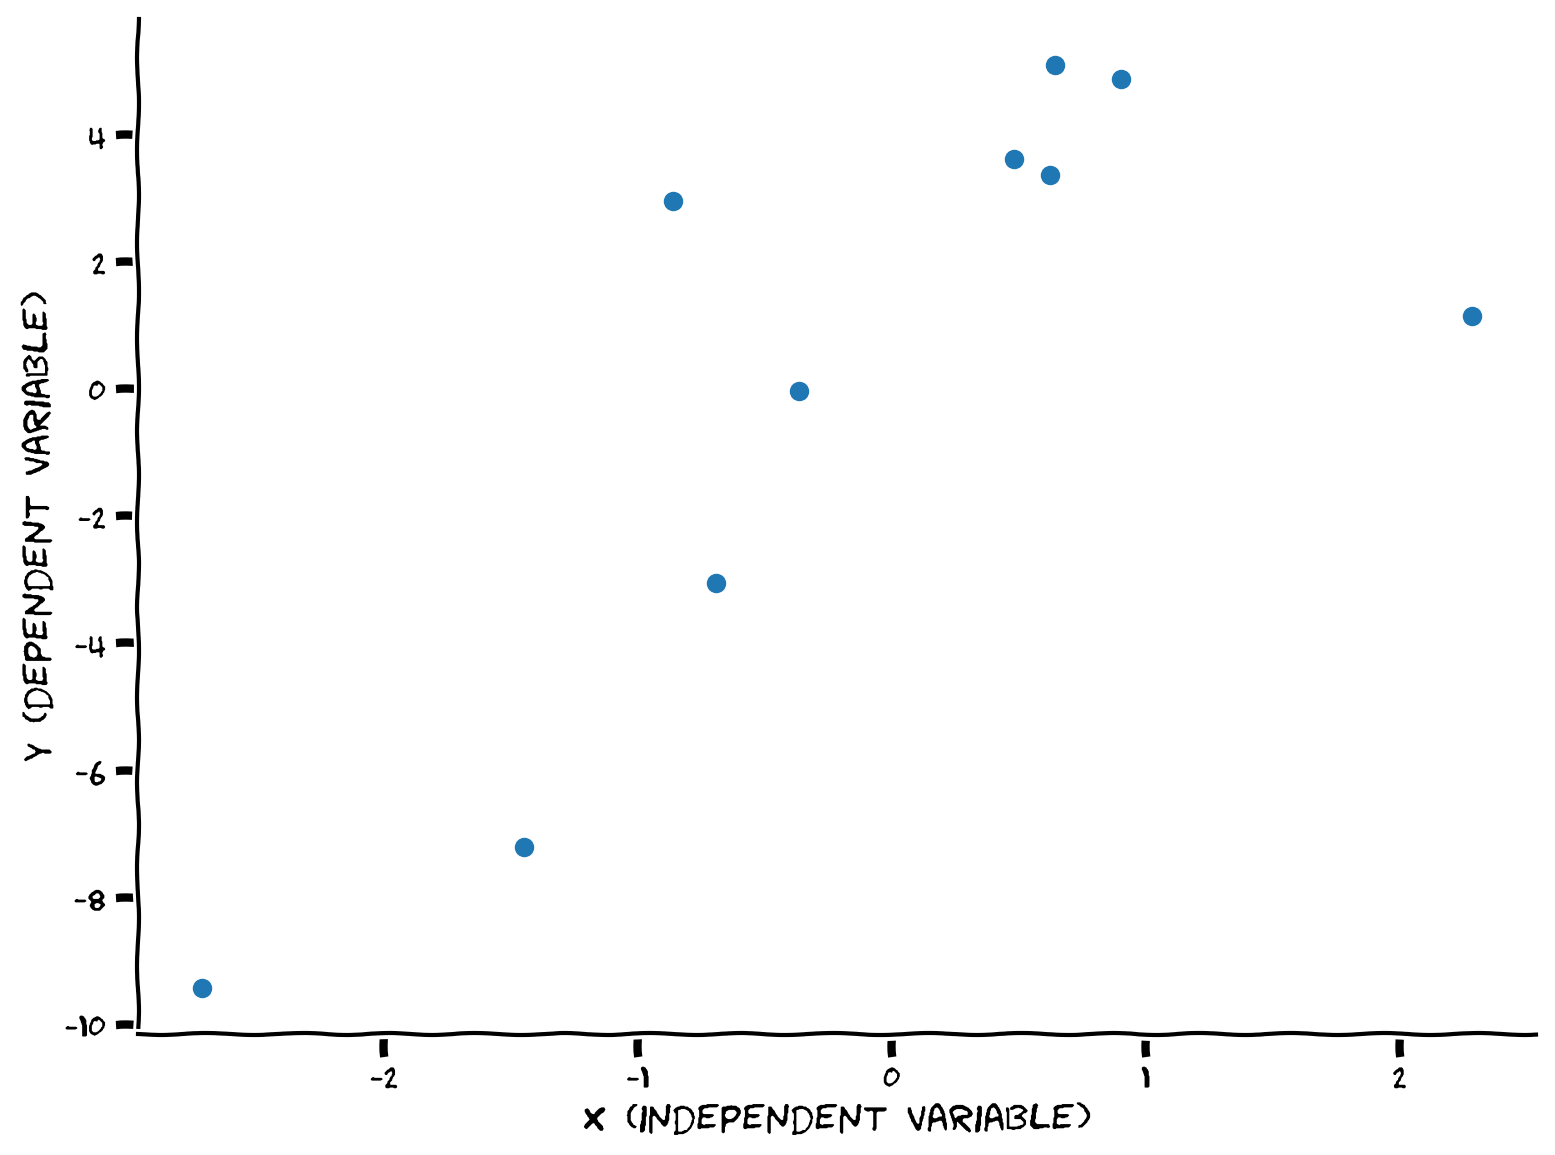

In [21]:
def synthetic_dataset(weights, bias, num_examples=1000, sigma=0.01, seed=2021):
  """
  Synthetic data generator in the form:
      y = Xw + b + gaussian_noise(0, sigma).
  
  Parameters
  ----------
  weights : torch.tensor
      weights. The length of `w` denotes the number of independent variables
  bias : torch.tensor
      bias (offset or intercept).
  num_examples : INT, optional
      DESCRIPTION. The default is 1000.
  sigma : FLOAT, optional
      Standard deviation of the Gaussian noise. The default is 0.01.
  seed : INT, optional
      Seed the RNG for reproducibility. The default is 2021.
  
  Returns
  -------
  X: torch.tensor
      the independent variable(s).
  y: torch.tensor
      the dependent variable
  
  """

  # Set the seed for reproducibility
  set_seed(seed)

  X = torch.normal(0, 1, (weights.shape[0], num_examples))
  # Have a comment for every line of code they need to write, and when possible have
  # variables written with ellipses where they should fill in or ellipses where they should
  # fill in inputs to functions
  y = torch.matmul(w.T, X) + b
  # Another comment because they need to add another line of code
  y += torch.normal(0, sigma, y.shape)

  return X, y.reshape((-1, 1))


w = torch.tensor([2.5]).reshape(-1,1)
b = 1.2
N = 50

# Uncomment the code below to test your function
# we usually define the plotting function in the hidden Helper Functions
# so students don't have to see a bunch of boilerplate matplotlib code
# xkcd style for solution plot
X, y = synthetic_dataset(weights=w, bias=b, num_examples=10, sigma=2.5,
                         seed=2021)
with plt.xkcd():
  plot_data(X, y)

---
# Section 4: Code Style Guide

This section will give you the information you'll need to write clear code in your networks and exercises. All code should be written in pytorch and follow standard PEP8 styleguides. 

In [22]:
# @title Video 3: Video 3 Name
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')  
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'video_id_youtube'), ('Bilibili', 'video_id_bilibili'), ('Osf', 'video_id_osf')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

## Section 4.1 Building your network

## Layer names guide
 Having consistent layer promotes learning by focusing attention on relevant changes to code. Students will take just as long to figure out why output layer is called 'fc' vs 'out' or 'linear' as they do to figure out which layer to use. For these common layers please adhere to the naming conventions below.
for multiple layers please use: name1 , name2 to differentiate  





---
Layer guide
1.   self.fc  = nn.Linear()    (for Fully Connected)
2.   self.conv = nn.Conv2d()  
3.   self.pool = nn.MaxPool()  
4.   self.dropout = nn.Dropout() 
5.   self.batch_norm = nn.BatchNorm2d() 
6.   self.relu = F.Relu() 
7.   etc...
---


 If there is some edge case and you feel the name is not elegant enough or you have important reason to name layers do so as:  name_* .

 For example, if you want a linear encoding and decoding layer, fc1 and fc2 would be confusing, so for clarity, you should write the layers as

  fc_encoding_layer, fc_decoding_layer. 








In [23]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    ####################################################################
    # Fill in missing code below (...),
    # then remove or comment the line below to test your function
    raise NotImplementedError("Define the required layers")
    ####################################################################
    self.conv1 = nn.Conv2d(...)
    self.conv2 = nn.Conv2d(...)
    self.fc1 = nn.Linear(...)
    self.fc2 = nn.Linear(...)
    self.pool = nn.MaxPool2d(...)

  def forward(self, x):
    ####################################################################
    # Fill in missing code below (...),
    # then remove or comment the line below to test your function
    # Hint: Do not forget to flatten the image as it goes from Convolution Layers to Linear Layers!
    raise NotImplementedError("Define forward pass for any input x")
    ####################################################################
    x = ...


In [24]:
# to_remove solution
class CNN(nn.Module):
  def __init__(self):
  
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, 3)
    self.conv2 = nn.Conv2d(32, 64, 3)
    self.fc1 = nn.Linear(9216, 128)
    self.fc2 = nn.Linear(128, 2)
    self.pool = nn.MaxPool2d(2)

  def forward(self, x):
    x = self.conv1(x)
    x = F.relu(x)
    x = self.conv2(x)
    x = F.relu(x)
    x = self.pool(x)
    x = torch.flatten(x, 1)
    x = self.fc1(x)
    x = F.relu(x)        
    x = self.fc2(x)
    return x


## Section 4.2: Model Training
Training models is often a time consuming process of DL. Given the limited time and different compute power the class will have, that is time we cannot afford. 

For your lectures you should make use of what we like to call the 'cooking show' method of tutorial preparation. They are as follows.



1.   Ingredients
2.   Recipe
3.   "Here is one I already prepared"
4.   Tasting 



---
1.   have an exercise to demonstrate the intuition of what the  key pieces of the network are doing
2.   have an exercise that shows how the pieces all fit together 
3.   If training will take more than 5 minutes, load pretrained network.
4.   Have students evaluate how pretrained or state of the art model performs. Have them try and break it! Understanding the current limits of DL shows students that DL isn't magic and gives insight as to what DL is good for. Plus students love it!  
---



## Section 4.3: Munging Guide
Data Munging- ( transformation,permutation,manipulation ) is one of the hardest sections for a new student to master. Our general aim is to mitigate that as much as possible by doing several things

---
*   Putting Munging operations in their own lines for code exercises 
*   Providing clear,descriptive code hints for what transformation needs to occur (i.e don't use `.view` !) 
*   use operations that are explicit to allow the student more insight.


---

## Examples 
Here is an example of a network that uses thes approaches well note how:


1.   Tensor inputs and outputs shapes are clearly labeled
2.   Hints are given when changes in these shapes occur




In [25]:
class Encoder(nn.Module):
  """The RNN encoder for sequence to sequence learning."""
  def __init__(self, vocab_size, embed_size, num_hiddens, num_layers,
                dropout=0):
    super(Encoder, self).__init__()

    self.embedding = nn.Embedding(vocab_size, embed_size)
    self.gru = nn.GRU(embed_size, num_hiddens, num_layers,
                      dropout=dropout)

  def forward(self, X):
    """Hint: always make sure your sizes are correct"""
    ####################################################################
    # Fill in missing code below (...),
    # then remove or comment the line below to test your function
    raise NotImplementedError("Encoder Forward")
    ####################################################################

    # The output `X` shape: (`batch_size`, `num_steps`, `embed_size`)

    # Embedding layer + reshape
    X = ...

    # Recurrent unit

    # `output` shape: (`num_steps`, `batch_size`, `num_hiddens`)
    # `state` shape: (`num_layers`, `batch_size`, `num_hiddens`)
    return output, state


class Decoder(nn.Module):
    """The RNN decoder for sequence to sequence learning."""
    def __init__(self, vocab_size, embed_size, num_hiddens, num_layers,
                 dropout=0):
        super(Decoder, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        
        self.gru = nn.GRU(embed_size + num_hiddens, num_hiddens, num_layers,
                          dropout=dropout)
        self.dense = nn.Linear(num_hiddens, vocab_size)
        
    def init_state(self, enc_outputs):
        return enc_outputs[1]

    def forward(self, X, state):
        """Hint: always make sure your sizes are correct"""
        ####################################################################
        # Fill in missing code below (...),
        # then remove or comment the line below to test your function
        raise NotImplementedError("Decoder Forward")
        ####################################################################

        # The output `X` shape: (`num_steps`, `batch_size`, `embed_size`)
        X = ...
        # Broadcast `context` so it has the same `num_steps` as `X`
        context = ...

        # Concatenate X and context 
        X_and_context = ...

        # Recurrent unit
        output, state = self.rnn(X_and_context, state)

        # Linear layer
        output = ...

        # `output` shape: (`batch_size`, `num_steps`, `vocab_size`)
        # `state` shape: (`num_layers`, `batch_size`, `num_hiddens`)
        return output, state

# # Uncomment to run
# encoder = Encoder(1000, 300, 100, 2, 0.1)
# decoder = Decoder(1000, 300, 100, 2, 0.1)
# print(encoder)
# print(decoder)

### Here's a bad example 

Look at the LSTM's forward method, the first instance is what the student see's and forward method after the `#solution to_remove` is the perscribed answer


In [26]:
class LSTM(nn.Module):
  def __init__(self, layers, output_size, hidden_size, vocab_size, embed_size):
    super(LSTM, self).__init__()

    self.output_size = output_size
    self.hidden_size = hidden_size
    self.vocab_size = vocab_size
    self.embed_size = embed_size
    self.n_layers = layers

    ####################################################################
    # Fill in missing code below (...),
    # then remove or comment the line below to test your function
    raise NotImplementedError("LSTM Init")
    ####################################################################
    self.word_embeddings = ...
    self.dropout = ...
    self.lstm = ...
    self.fc = ...

  def forward(self, input_sentences):
    """Hint: Make sure the shapes of your tensors match the requirement"""

    ####################################################################
    # Fill in missing code below (...),
    # then remove or comment the line below to test your function
    raise NotImplementedError("LSTM Forward")
    ####################################################################

    # Embeddings 
    # `input` shape: (`num_steps`, `batch_size`, `num_hiddens`)
    input = ...

    # Initialize a random hidden state and cell state for this sequence
    hidden = (torch.randn(self.n_layers, input.shape[1], self.hidden_size).to(device),
            torch.randn(self.n_layers, input.shape[1], self.hidden_size).to(device))

    # Dropout for regularization
    input = self.dropout(input)

    # LSTM 
    output, hidden = ...

    # Pick the hidden state (not cell state) and reshape it for the linear layer
    h_n = ...

    # Linear 
    logits = self.fc(h_n)
    return logits

# # Uncomment to run
# sampleLSTM = LSTM(3, 10, 100, 1000, 300)
# print(sampleLSTM)



# Solution - to remove
class LSTM(nn.Module):
  def __init__(self, layers, output_size, hidden_size, vocab_size, embed_size):
    super(LSTM, self).__init__()

    self.output_size = output_size
    self.hidden_size = hidden_size
    self.vocab_size = vocab_size
    self.embed_size = embed_size
    self.n_layers = layers

    self.word_embeddings = nn.Embedding(vocab_size, embed_size)
    self.dropout = nn.Dropout(0.5)
    self.lstm = nn.LSTM(embed_size, hidden_size, num_layers=self.n_layers)
    self.fc = nn.Linear(self.n_layers*self.hidden_size, output_size)

  def forward(self, input_sentences):
    input = self.word_embeddings(input_sentences).permute(1, 0, 2)
    hidden = (torch.randn(self.n_layers, input.shape[1], self.hidden_size).to(device),
            torch.randn(self.n_layers, input.shape[1], self.hidden_size).to(device))
    input = self.dropout(input)
    output, hidden = self.lstm(input, hidden)
    h_n = hidden[0].permute(1, 0, 2)
    h_n = h_n.contiguous().view(h_n.shape[0], -1)
    logits = self.fc(h_n)
    return logits

There are several problems with this section, including:

1.   Too many composed functions written in one line
2.   no code hints to students describing what manipulations need to occur
3.   It is not obvious what is occuring in the two h_n manipulations as the code is generic 
4.   Using Logits as output and using output as a different variable is confusing 



## Section 4.4: Munging Code Best Practices 
while not a complete list, here are some common operations and how to make them more interpretable

In [27]:
# using rearrage instead of transpose allows users to understand from code
# which dimensions are changing

from einops import rearrange

# `ims` is a input ( `batch_size`, `height`, `width`, `num_channels` ) tensor
ims = torch.rand(5, 100, 128, 3)

# ims.transpose(0,2,1,3) equivalent 
t = rearrange(ims, 'b h w c -> b w h c')
print(t.shape)

torch.Size([5, 128, 100, 3])


Full einops tutorial [here](http://einops.rocks/1-einops-basics/#welcome-to-einops-land)

### Flattening tensors

In [28]:
# Flatten Tensors with rearrange or torch.flatten
# ims.view(-1)

t = torch.flatten(ims, start_dim=1, end_dim = 2)
print(t.shape)

torch.Size([5, 12800, 3])


### Adding dimensions

In [29]:
# Add dimensions using unsqueeze 
im = torch.rand(100, 128)

# lets say im is one image from our dataset and we want to set it back to 
# a 4-d `batch` , `height`, `width`, `channels` tensor 

t = im.unsqueeze(0).unsqueeze(3) 
print(t.shape)

torch.Size([1, 100, 128, 1])


---
# Section 5: NLP Specific info

From Dr. Lyle Ungar 

1.   This is a international class so use Glove for word embedding.
2.   Use smaller networks, RoBERTA works even better than BERT and is same size. it will have a warning that CLS token is untrained but can suppress.
3.   Training times for NLp can be quite large so be sure to use pretrained models when appropriate












---
# Section 6: RL Specific Info
### TO-DO